# Notebook 2
This is an optional additional Google Colab notebook.

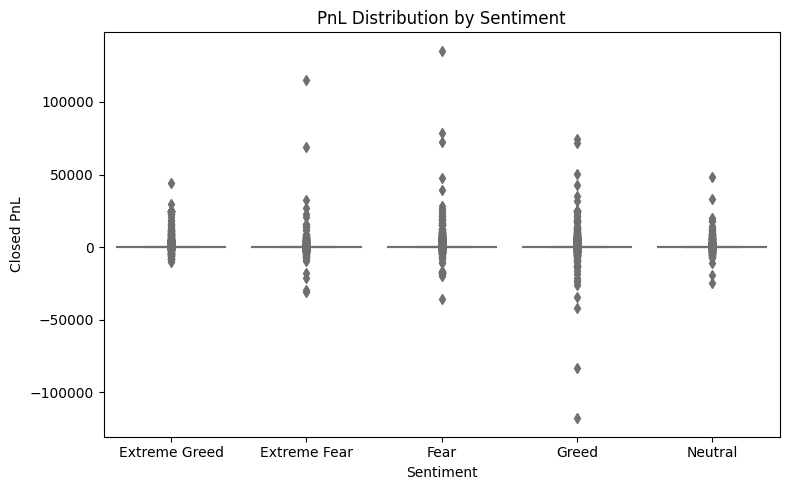

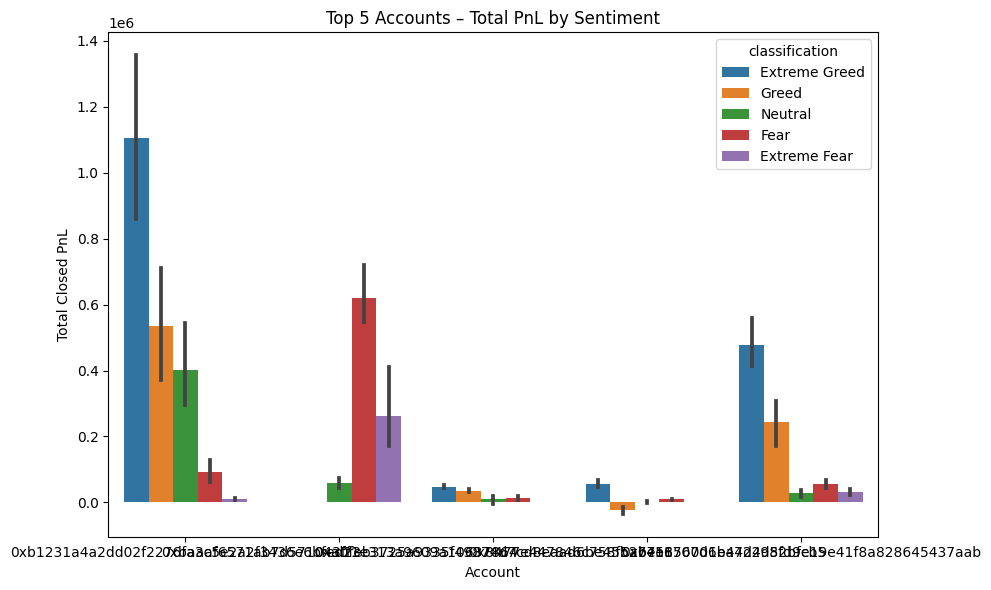

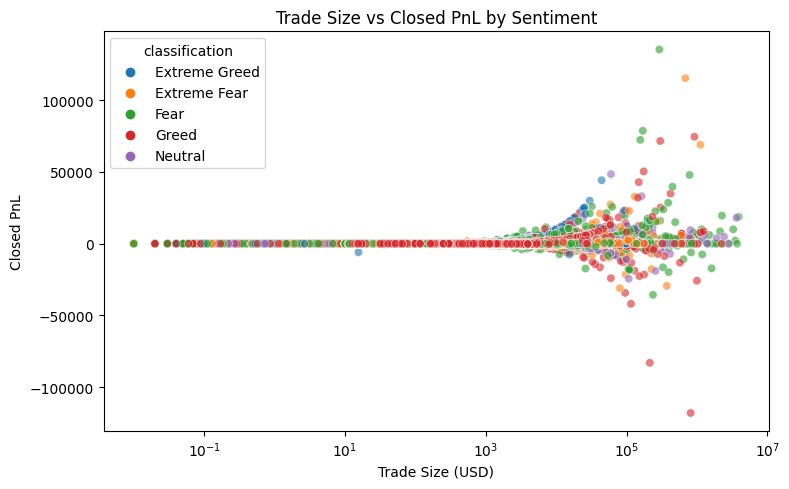

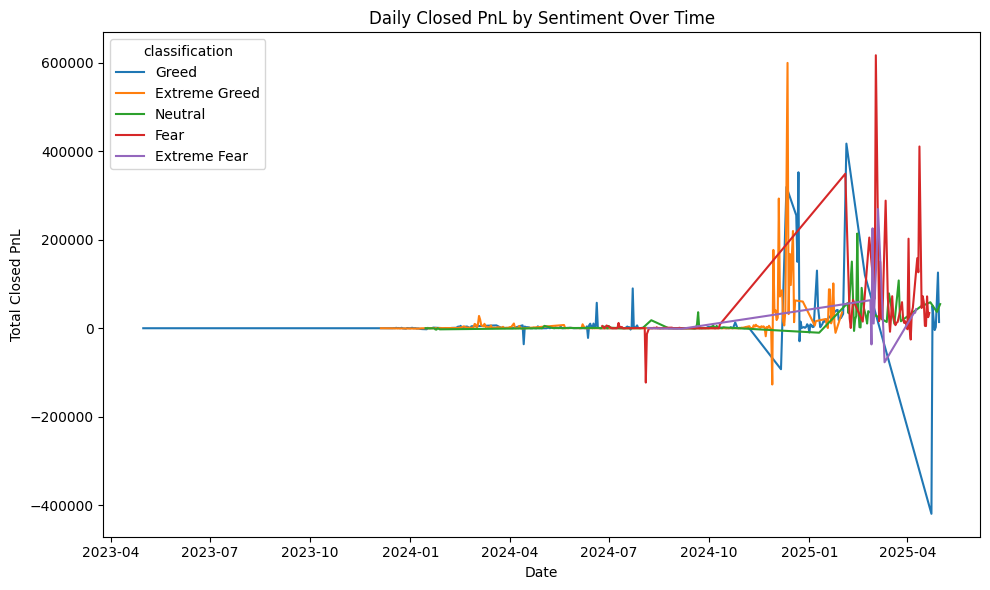

✅ Advanced analysis complete. Plots saved in 'outputs/', report saved as 'ds_report.pdf'.


In [1]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.pagesizes import A4
from reportlab.lib.styles import getSampleStyleSheet

# 📁 Create outputs folder if not exists
os.makedirs("outputs", exist_ok=True)

# 🔹 1. Load Merged Data
df = pd.read_csv("csv_files/merged_data.csv", parse_dates=["time"])

# ===============================
# 🔹 2. Sentiment-Wise PnL Distribution
# ===============================
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='classification', y='closedPnL', palette='pastel')
plt.title("PnL Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Closed PnL")
plt.tight_layout()
pnl_boxplot_path = "outputs/pnl_boxplot_by_sentiment.png"
plt.savefig(pnl_boxplot_path)
plt.show()

# ===============================
# 🔹 3. Account-Level Performance by Sentiment
# ===============================
top_accounts = df['account'].value_counts().nlargest(5).index.tolist()
subset = df[df['account'].isin(top_accounts)]

plt.figure(figsize=(10, 6))
sns.barplot(data=subset, x='account', y='closedPnL', hue='classification', estimator='sum')
plt.title("Top 5 Accounts – Total PnL by Sentiment")
plt.xlabel("Account")
plt.ylabel("Total Closed PnL")
plt.tight_layout()
account_pnl_path = "outputs/account_pnl_by_sentiment.png"
plt.savefig(account_pnl_path)
plt.show()

# ===============================
# 🔹 4. Trade Size vs PnL
# ===============================
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='size_usd', y='closedPnL', hue='classification', alpha=0.6)
plt.title("Trade Size vs Closed PnL by Sentiment")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Closed PnL")
plt.xscale('log')
plt.tight_layout()
trade_size_pnl_path = "outputs/trade_size_vs_pnl.png"
plt.savefig(trade_size_pnl_path)
plt.show()

# ===============================
# 🔹 5. Daily PnL Trend by Sentiment
# ===============================
df['date'] = pd.to_datetime(df['date'])
daily_pnl = df.groupby(['date', 'classification'])['closedPnL'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_pnl, x='date', y='closedPnL', hue='classification')
plt.title("Daily Closed PnL by Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Total Closed PnL")
plt.tight_layout()
daily_pnl_path = "outputs/daily_pnl_by_sentiment.png"
plt.savefig(daily_pnl_path)
plt.show()

# ===============================
# 🔹 6. Generate PDF Report
# ===============================
pdf_path = "ds_report.pdf"
doc = SimpleDocTemplate(pdf_path, pagesize=A4)
styles = getSampleStyleSheet()
content = []

# Title
content.append(Paragraph("<b>Trader Performance vs Market Sentiment – Advanced Analysis</b>", styles['Title']))
content.append(Spacer(1, 12))

# Summary
summary_text = """
This report extends the analysis from Notebook 1 by diving deeper into trader behaviour
under different market sentiment classifications (Fear / Greed / Neutral).

Key insights include:
- Distribution of PnL varies significantly across sentiment types.
- Some accounts consistently perform better under certain sentiment conditions.
- Trade size correlates with extreme PnL values, especially during high Greed/Fear.
- Daily PnL trends reveal sentiment-dependent volatility patterns.
"""
content.append(Paragraph(summary_text, styles['BodyText']))
content.append(Spacer(1, 12))

# Add plots
for img_path, caption in [
    (pnl_boxplot_path, "PnL Distribution by Sentiment"),
    (account_pnl_path, "Top 5 Accounts – Total PnL by Sentiment"),
    (trade_size_pnl_path, "Trade Size vs Closed PnL by Sentiment"),
    (daily_pnl_path, "Daily Closed PnL by Sentiment Over Time")
]:
    content.append(Paragraph(f"<b>{caption}</b>", styles['Heading3']))
    content.append(Image(img_path, width=400, height=250))
    content.append(Spacer(1, 12))

# Build PDF
doc.build(content)

print(f"✅ Advanced analysis complete. Plots saved in 'outputs/', report saved as '{pdf_path}'.")
